In [1]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
print('Training Images: {}'.format(X_train.shape))
print('Testining Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testining Images: (10000, 32, 32, 3)


In [4]:
print(X_train[0].shape)

(32, 32, 3)


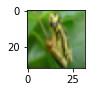

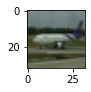

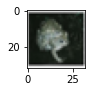

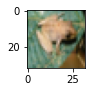

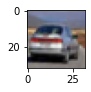

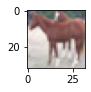

In [5]:
for i in range(232,238):
  plt.subplot(120+ 1+ i)
  img = X_train[i]
  plt.imshow(img)
  plt.show()

In [6]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [12]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test=X_test/255
n_classes = 10

print("Shape before one hot encoding: ", y_train.shape)
Y_train =np_utils.to_categorical(y_train, n_classes)
Y_test =np_utils.to_categorical(y_test, n_classes)
print("Shape after one hot encoding: ", Y_train.shape)

Shape before one hot encoding:  (50000, 1)
Shape after one hot encoding:  (50000, 10)


In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding = 'same', activation='relu', input_shape= (32,32,3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding = 'same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding = 'same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 599s 2s/step - loss: 2.6966 - accuracy: 0.2967 - val_loss: 1.5069 - val_accuracy: 0.4555
Epoch 2/10
391/391 [==============================] - 641s 2s/step - loss: 1.4849 - accuracy: 0.4629 - val_loss: 1.4124 - val_accuracy: 0.5098
Epoch 3/10
391/391 [==============================] - 561s 1s/step - loss: 1.2857 - accuracy: 0.5420 - val_loss: 1.1091 - val_accuracy: 0.6191
Epoch 4/10
391/391 [==============================] - 535s 1s/step - loss: 1.1570 - accuracy: 0.5921 - val_loss: 1.0107 - val_accuracy: 0.6599
Epoch 5/10
391/391 [==============================] - 537s 1s/step - loss: 1.0621 - accuracy: 0.6290 - val_loss: 0.9256 - val_accuracy: 0.6840
Epoch 6/10
391/391 [==============================] - 535s 1s/step - loss: 0.9828 - accuracy: 0.6595 - val_loss: 0.9228 - val_accuracy: 0.6962
Epoch 7/10
391/391 [==============================] - 534s 1s/step - loss: 0.9314 - accuracy: 0.6770 - val_loss: 0.8671 - val_accuracy: 0.7065

In [20]:
classes = range(0, 10)

names = ['airplane', 
         'automobile',
         'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck']

class_labels = dict(zip(classes, names))

batch = X_test[100:109]
labels = np.argmax(Y_test[100:109], axis= -1)

predictions = model.predict(batch, verbose=1)
print(predictions)

1/1 [==============================] - 0s 143ms/step
[[4.69253078e-04 9.68231107e-05 3.90589759e-02 5.64001538e-02
  4.19329882e-01 9.17977095e-02 1.10453581e-02 3.81059408e-01
  3.08169867e-04 4.34389425e-04]
 [7.35559221e-03 2.28638155e-03 8.07133541e-02 2.36618727e-01
  1.36779144e-01 3.25144798e-01 1.03660531e-01 9.67043787e-02
  4.64446377e-03 6.09268667e-03]
 [3.90259800e-07 3.45090569e-07 7.01617741e-04 2.56551057e-03
  2.21917100e-04 2.88823713e-03 9.93619740e-01 1.46086052e-06
  1.87328894e-07 6.14468604e-07]
 [1.45394471e-03 3.34798133e-05 2.67550573e-02 2.77054518e-01
  1.67153254e-02 3.12190577e-02 6.45707309e-01 3.87820619e-04
  2.10195081e-04 4.63369943e-04]
 [3.90460536e-06 9.81374860e-01 2.53688845e-12 6.10393030e-12
  7.16320686e-15 1.65654640e-13 1.12058301e-12 1.55321990e-12
  1.94810127e-05 1.86017603e-02]
 [6.60560818e-06 9.99050319e-01 4.33902581e-10 2.17374507e-10
  1.36707350e-13 4.70391434e-11 1.27671740e-09 1.08827303e-12
  2.05796150e-05 9.22521576e-04]
 [4.4

In [21]:
for image in predictions: 
  print(np.sum(image))

1.0000001
1.0000001
1.0000001
1.0000001
1.0
1.0
1.0000001
1.0000001
1.0000001


In [22]:
class_result = np.argmax(predictions, axis= -1)
print(class_result)

[4 5 6 6 1 1 6 6 8]


In [23]:
'''diction - class labels [0:'aeroplane',....]
actual test questions _.batch
predicted value -> class result 
labels -> Actual answers '''

"diction - class labels [0:'aeroplane',....]\nactual test questions _.batch\npredicted value -> class result \nlabels -> Actual answers "

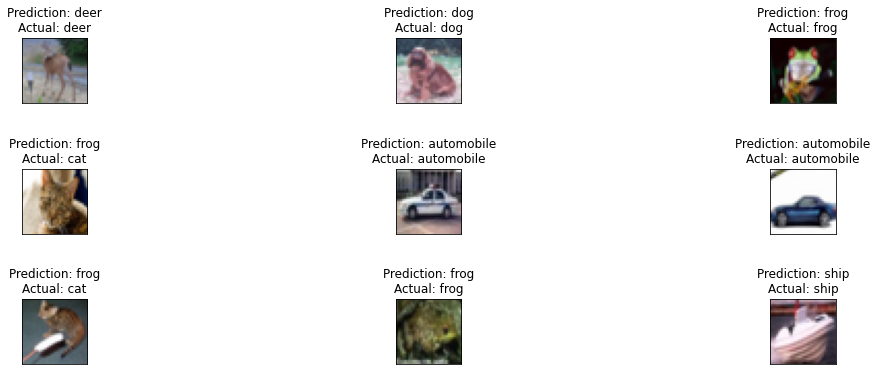

In [27]:
fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace=1)
axs = axs.flatten()

for i, img in enumerate(batch):
  for key, value in class_labels.items():
    if class_result[i] == key:
      title = "Prediction: {}\nActual: {}".format(class_labels[key], class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)

  axs[i].imshow(img)

plt.show()